<h1 style="text-align:center">
    Current and Future Technological Trends
</h1>

## Objectives


In this project you will perform the following:

Analyze the data and obtain valuable insights into current and future technological trends using the latest Stack Overflow Developer Survey dataset. These insights will play a key role in guiding strategic business decisions.

## Prepare environment
**Install the libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



In [37]:
# Step 1: Load the dataset from local disk

import zipfile

# Path to your ZIP file
zip_path = "survey_data.zip"
csv_filename = "survey_data.csv"  # name of the CSV inside the ZIP

# Open the ZIP and read the CSV directly
with zipfile.ZipFile(zip_path) as z:
    with z.open(csv_filename) as f:
        df = pd.read_csv(f)

# Display the first few rows to understand the structure of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [38]:
print(df.shape)
print(df.dtypes)

(65437, 114)
ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object


In [39]:
missing_values = df.isnull().sum().sort_values(ascending=False)
print(missing_values)
df.describe()

AINextMuch less integrated    64289
AINextLess integrated         63082
AINextNo change               52939
AINextMuch more integrated    51999
EmbeddedAdmired               48704
                              ...  
MainBranch                        0
Check                             0
Employment                        0
Age                               0
ResponseId                        0
Length: 114, dtype: int64


,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


# Check for duplicates

In [40]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


# Cleaning up inconsistent values in the Country column.

In [41]:
country_dict = {
    'United States of America': 'USA',
    'United Kingdom of Great Britain and Northern Ireland': 'Great Britain'
}
df['Country'] = df['Country'].replace(country_dict)

# Standardizing values in the `EdLevel` column.

In [42]:
educ_dict = {
    'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 'Bachelor’s degree',
    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 'Master’s degree',
    'Some college/university study without earning a degree': 'college/university (no degree)',
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 'Secondary school',
    'Professional degree (JD, MD, Ph.D, Ed.D, etc.)': 'Professional',
    'Associate degree (A.A., A.S., etc.)': 'Associate',
}
df['EdLevel'] = df['EdLevel'].replace(educ_dict)

# Handling Missing Values

In [44]:
missing_values = df.isnull().sum().sort_values(ascending=True).head(20)
print(missing_values)

ResponseId                         0
MainBranch                         0
Age                                0
Employment                         0
Check                              0
AISelect                        4530
EdLevel                         4653
LearnCode                       4949
NEWSOSites                      5151
YearsCode                       5568
LanguageHaveWorkedWith          5692
SOAccount                       5877
SOVisitFreq                     5901
DevType                         5992
SOComm                          6274
SOHow                           6475
Country                         6507
OpSysPersonal use               7263
NEWCollabToolsHaveWorkedWith    7845
SurveyEase                      9199
dtype: int64


# Imputing missing values in numerical and categorical columns.

In [45]:
# For numerical columns (e.g., WorkExp), I filled missing values with the mean.
missing_values_WorkExp = df['WorkExp'].isnull().sum()
print(f"Missing values in 'WorkExp': {missing_values_WorkExp}")
mean_exp = round(df['WorkExp'].mean(), 2)
df['WorkExp'] = df['WorkExp'].fillna(mean_exp)
print("Mean WorkExp", mean_exp)

Missing values in 'WorkExp': 35779
Mean WorkExp 11.47


In [46]:
print(f"Missing values in 'WorkExp': {df['WorkExp'].isnull().sum()}")

Missing values in 'WorkExp': 0


In [47]:
# For categorical columns (e.g., RemoteWork), I used the mode.
missing_values_remote = df['RemoteWork'].isnull().sum()
print(f"Missing values in 'RemoteWork': {missing_values_remote}")
most_frequent_value = df['RemoteWork'].mode()[0]
print(f"Most frequent value in 'RemoteWork': {most_frequent_value}")

Missing values in 'RemoteWork': 10631
Most frequent value in 'RemoteWork': Hybrid (some remote, some in-person)


In [48]:
df['RemoteWork'] = df['RemoteWork'].fillna(most_frequent_value)
print(f"Missing values in 'RemoteWork': {df['RemoteWork'].isnull().sum()}")

Missing values in 'RemoteWork': 0


# Feature Scaling and Transformation.
Applying Min-Max Scaling to normalize the `ConvertedCompYearly` column.

In [51]:
# Created a new dataset
df_normalazed_comp = df[df['ConvertedCompYearly'].notnull()].copy()

# Normalozing Min-Max
min_value = df_normalazed_comp['ConvertedCompYearly'].min()
max_value = df_normalazed_comp['ConvertedCompYearly'].max()
print (f'min {min_value}')
print (f'max {max_value}')

min 1.0
max 16256603.0


In [52]:
# Added a new column 'ConvertedCompYearly_MinMax'

df_normalazed_comp['ConvertedCompYearly_MinMax'] = (
    (df_normalazed_comp['ConvertedCompYearly'] - min_value) / (max_value - min_value) )
df_normalazed_comp.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,ConvertedCompYearly_MinMax
72,73,I am a developer by profession,18-24 years old,"Employed, full-time;Student, full-time;Indepen...","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,Secondary school,On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,100.0,100.0,100.0,50.0,90.0,Too long,Easy,7322.0,10.0,0.000450
374,375,"I am not primarily a developer, but I write co...",25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,Professional,Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Written-based...,...,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,30074.0,NaN,0.001850
379,380,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Bootstrapping a business,Master’s degree,Books / Physical media;Other online resources ...,Technical documentation;Books;Social Media;Wri...,...,0.0,0.0,0.0,0.0,0.0,Too long,Difficult,91295.0,10.0,0.005616
385,386,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,Hobby,Master’s degree,Books / Physical media;On the job training;Oth...,Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,Too short,Easy,53703.0,NaN,0.003303
389,390,I am a developer by profession,25-34 years old,"Employed, full-time;Student, part-time",Remote,Apples,Hobby;School or academic work,college/university (no degree),Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Coding sessio...,...,30.0,5.0,20.0,10.0,5.0,Too long,Easy,110000.0,10.0,0.006766


Log-transforming the ConvertedCompYearly column to reduce skewness.

In [54]:
# Added a new column 'ConvertedCompYearly_Log'
df_normalazed_comp['ConvertedCompYearly_Log'] = np.log(df_normalazed_comp['ConvertedCompYearly'])
df_normalazed_comp.head(10)

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,ConvertedCompYearly_MinMax,ConvertedCompYearly_Log
72,73,I am a developer by profession,18-24 years old,"Employed, full-time;Student, full-time;Indepen...","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,Secondary school,On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,100.0,100.0,50.0,90.0,Too long,Easy,7322.0,10.0,0.000450,8.898639
374,375,"I am not primarily a developer, but I write co...",25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,Professional,Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Written-based...,...,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,30074.0,NaN,0.001850,10.311416
379,380,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Bootstrapping a business,Master’s degree,Books / Physical media;Other online resources ...,Technical documentation;Books;Social Media;Wri...,...,0.0,0.0,0.0,0.0,Too long,Difficult,91295.0,10.0,0.005616,11.421851
385,386,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,Hobby,Master’s degree,Books / Physical media;On the job training;Oth...,Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,Too short,Easy,53703.0,NaN,0.003303,10.891224
389,390,I am a developer by profession,25-34 years old,"Employed, full-time;Student, part-time",Remote,Apples,Hobby;School or academic work,college/university (no degree),Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Coding sessio...,...,5.0,20.0,10.0,5.0,Too long,Easy,110000.0,10.0,0.006766,11.608236
392,393,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects,Professional,Books / Physical media,NaN,...,10.0,0.0,0.0,5.0,Appropriate in length,Neither easy nor difficult,161044.0,7.0,0.009906,11.989433
395,396,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby,Master’s degree,Books / Physical media;On the job training;Oth...,Technical documentation;Blogs;Books;Stack Over...,...,NaN,NaN,NaN,NaN,Appropriate in length,Easy,121018.0,NaN,0.007444,11.703695
398,399,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Other (please specify):,college/university (no degree),Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,30.0,0.0,0.0,0.0,Appropriate in length,Easy,195000.0,5.0,0.011995,12.180755
403,404,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby,college/university (no degree),Books / Physical media;Other online resources ...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,44586.0,NaN,0.002743,10.705175
409,410,"I am not primarily a developer, but I write co...",55-64 years old,"Employed, full-time",In-person,Apples,Hobby;Contribute to open-source projects,Professional,Books / Physical media;Colleague;Other online ...,Technical documentation;Written Tutorials;Stac...,...,NaN,NaN,NaN,NaN,Appropriate in length,Easy,57999.0,NaN,0.003568,10.968181


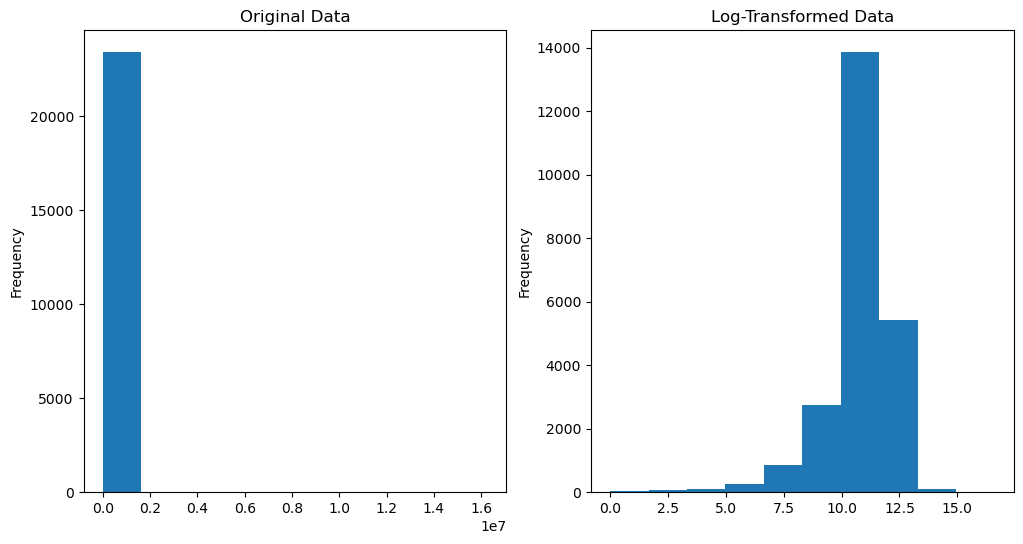

In [55]:
# Plot the original vs. log-transformed data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df_normalazed_comp['ConvertedCompYearly'].plot(kind='hist', bins=10, title='Original Data')
plt.subplot(1, 2, 2)
df_normalazed_comp['ConvertedCompYearly_Log'].plot(kind='hist', bins=10, title='Log-Transformed Data')
plt.show()

# Create a new column `ExperienceLevel` based on the `YearsCodePro` column

In [56]:
df_normalazed_comp['YearsCodePro'] = pd.to_numeric(df_normalazed_comp['YearsCodePro'], errors='coerce')
# Function to assign Experience Level based on YearsCodePro
def assign_experience_level(years):
    if pd.isna(years):  
        return 'Unknown'
    elif years <= 2:
        return 'Beginner'
    elif 3 <= years <= 5:
        return 'Intermediate'
    else:
        return 'Advanced'

df_normalazed_comp['ExperienceLevel'] = df_normalazed_comp['YearsCodePro'].apply(assign_experience_level)
df_normalazed_comp.head(10)

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,ConvertedCompYearly_MinMax,ConvertedCompYearly_Log,ExperienceLevel
72,73,I am a developer by profession,18-24 years old,"Employed, full-time;Student, full-time;Indepen...","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,Secondary school,On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,100.0,50.0,90.0,Too long,Easy,7322.0,10.0,0.000450,8.898639,Beginner
374,375,"I am not primarily a developer, but I write co...",25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,Professional,Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Written-based...,...,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,30074.0,NaN,0.001850,10.311416,Advanced
379,380,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Bootstrapping a business,Master’s degree,Books / Physical media;Other online resources ...,Technical documentation;Books;Social Media;Wri...,...,0.0,0.0,0.0,Too long,Difficult,91295.0,10.0,0.005616,11.421851,Advanced
385,386,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,Hobby,Master’s degree,Books / Physical media;On the job training;Oth...,Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,Too short,Easy,53703.0,NaN,0.003303,10.891224,Advanced
389,390,I am a developer by profession,25-34 years old,"Employed, full-time;Student, part-time",Remote,Apples,Hobby;School or academic work,college/university (no degree),Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Coding sessio...,...,20.0,10.0,5.0,Too long,Easy,110000.0,10.0,0.006766,11.608236,Advanced
392,393,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects,Professional,Books / Physical media,NaN,...,0.0,0.0,5.0,Appropriate in length,Neither easy nor difficult,161044.0,7.0,0.009906,11.989433,Advanced
395,396,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby,Master’s degree,Books / Physical media;On the job training;Oth...,Technical documentation;Blogs;Books;Stack Over...,...,NaN,NaN,NaN,Appropriate in length,Easy,121018.0,NaN,0.007444,11.703695,Advanced
398,399,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Other (please specify):,college/university (no degree),Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,Appropriate in length,Easy,195000.0,5.0,0.011995,12.180755,Advanced
403,404,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby,college/university (no degree),Books / Physical media;Other online resources ...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,Too long,Neither easy nor difficult,44586.0,NaN,0.002743,10.705175,Advanced
409,410,"I am not primarily a developer, but I write co...",55-64 years old,"Employed, full-time",In-person,Apples,Hobby;Contribute to open-source projects,Professional,Books / Physical media;Colleague;Other online ...,Technical documentation;Written Tutorials;Stac...,...,NaN,NaN,NaN,Appropriate in length,Easy,57999.0,NaN,0.003568,10.968181,Advanced


### Task 1: Visualizing Data Composition with Pie Charts


##### 1.1 Create a Pie Chart of the Top 5 Databases Respondents Want to Work With


In the survey data, the `DatabaseWantToWorkWith` column lists the databases that respondents wish to work with. Let’s visualize the top 5 most-desired databases in a pie chart.



In [5]:
db = df.dropna(subset=['DatabaseWantToWorkWith']) 
db.shape

(42558, 114)

In [6]:
db['DatabaseWantToWorkWith'] = db['DatabaseWantToWorkWith'].str.split(';')
db_exploded = db.explode('DatabaseWantToWorkWith')

C:\Users\borod\AppData\Local\Temp\ipykernel_2024\213521770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db['DatabaseWantToWorkWith'] = db['DatabaseWantToWorkWith'].str.split(';')


In [7]:
top_databases = db_exploded['DatabaseWantToWorkWith'].value_counts().head(5)
top_databases

DatabaseWantToWorkWith
PostgreSQL    24005
SQLite        13489
MySQL         12269
MongoDB       10982
Redis         10847
Name: count, dtype: int64

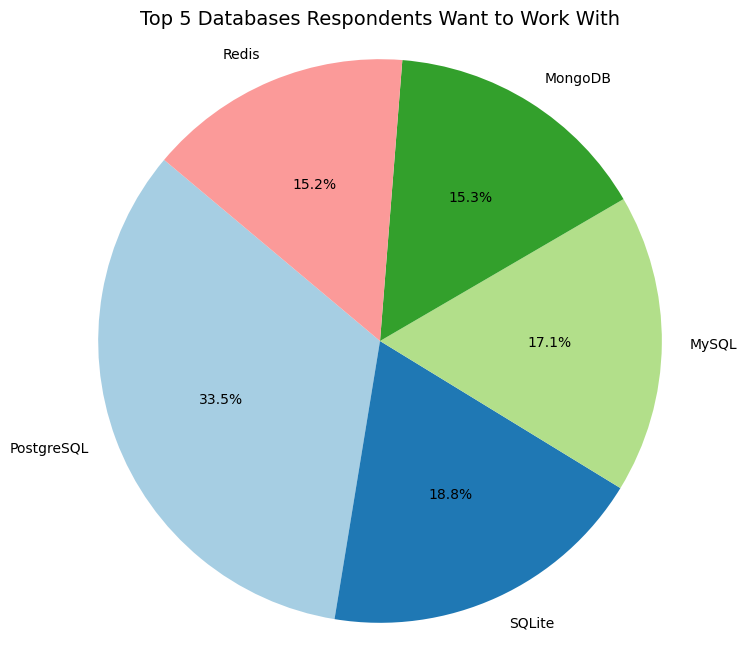

In [8]:
plt.figure(figsize=(8, 8))
colors = plt.cm.Paired.colors  # Use a color palette for distinct segments
plt.pie(
    top_databases,
    labels=top_databases.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)

# Add title
plt.title('Top 5 Databases Respondents Want to Work With', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle
plt.show()

In [9]:
db1 = df.dropna(subset=['DatabaseHaveWorkedWith']) 
db1.shape

(50254, 114)

In [10]:
db1['DatabaseHaveWorkedWith'] = db1['DatabaseHaveWorkedWith'].str.split(';')
db1_exploded = db1.explode('DatabaseHaveWorkedWith')

C:\Users\borod\AppData\Local\Temp\ipykernel_2024\3503381656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db1['DatabaseHaveWorkedWith'] = db1['DatabaseHaveWorkedWith'].str.split(';')


In [11]:
top_10_databases = db1_exploded['DatabaseHaveWorkedWith'].value_counts().head(10)
top_10_databases

DatabaseHaveWorkedWith
PostgreSQL              25536
MySQL                   21099
SQLite                  17365
Microsoft SQL Server    13275
MongoDB                 13007
Redis                   10463
MariaDB                  8991
Elasticsearch            6533
Oracle                   5273
Dynamodb                 4138
Name: count, dtype: int64

In [12]:
top_10_databases_df = top_10_databases.to_frame(name='Count')
top_10_databases_df.to_csv("D:\\My\\Юля\\Data_Analytics_Ex_Files_\\Coursera\\Assignments\\Capstone Project\\Dash1_top_10_DB.csv")

The `DevType` column lists the developer types for respondents. We’ll examine the distribution by showing the top 5 developer roles in a pie chart.



In [13]:
top_5_dev_types = df['DevType'].value_counts().head(5)
top_5_dev_types

DevType
Developer, full-stack                            18260
Developer, back-end                               9928
Student                                           5102
Developer, front-end                              3349
Developer, desktop or enterprise applications     2493
Name: count, dtype: int64

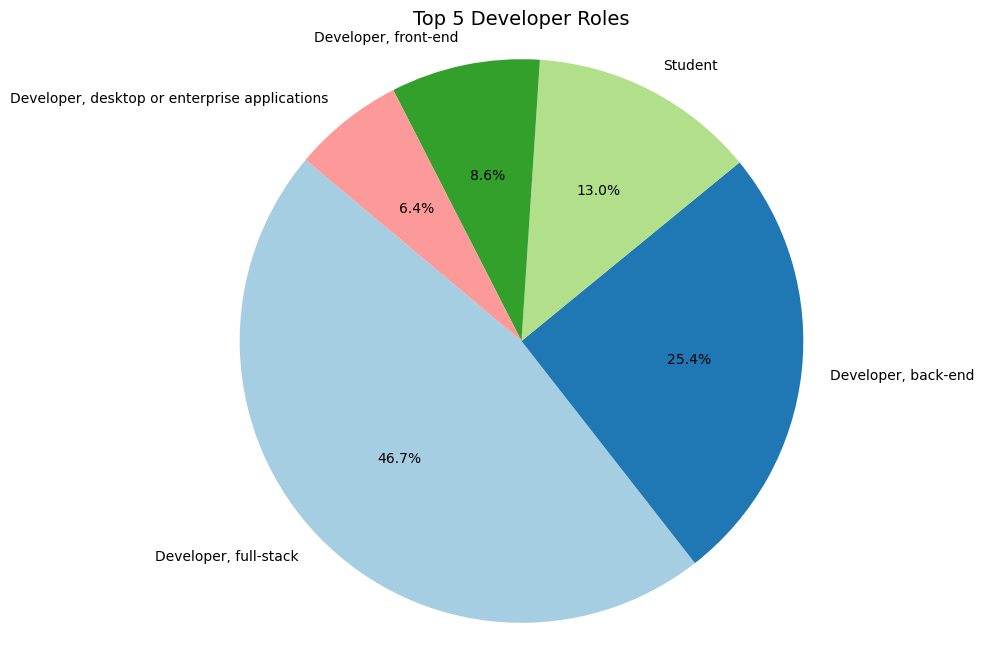

In [14]:
plt.figure(figsize=(8, 8))
colors = plt.cm.Paired.colors  # Use a color palette for distinct segments
plt.pie(
    top_5_dev_types,
    labels=top_5_dev_types.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)

# Add title
plt.title('Top 5 Developer Roles', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle
plt.show()

##### 1.3 Create a pie chart for the operating systems used by respondents for professional use


The `OpSysProfessional` use column shows the operating systems developers use professionally. Let’s visualize the distribution of the top operating systems in a pie chart.



In [15]:
df['OpSysProfessional use'] = df['OpSysProfessional use'].str.split(';')
db_exploded = df.explode('OpSysProfessional use')

In [16]:
df_op_sys = db_exploded['OpSysProfessional use'].value_counts().head(10)
df_op_sys

OpSysProfessional use
Windows                              27918
MacOS                                18625
Ubuntu                               16237
Windows Subsystem for Linux (WSL)     9859
Debian                                5327
Android                               4931
Other Linux-based                     4697
iOS                                   4280
Red Hat                               2858
Arch                                  2521
Name: count, dtype: int64

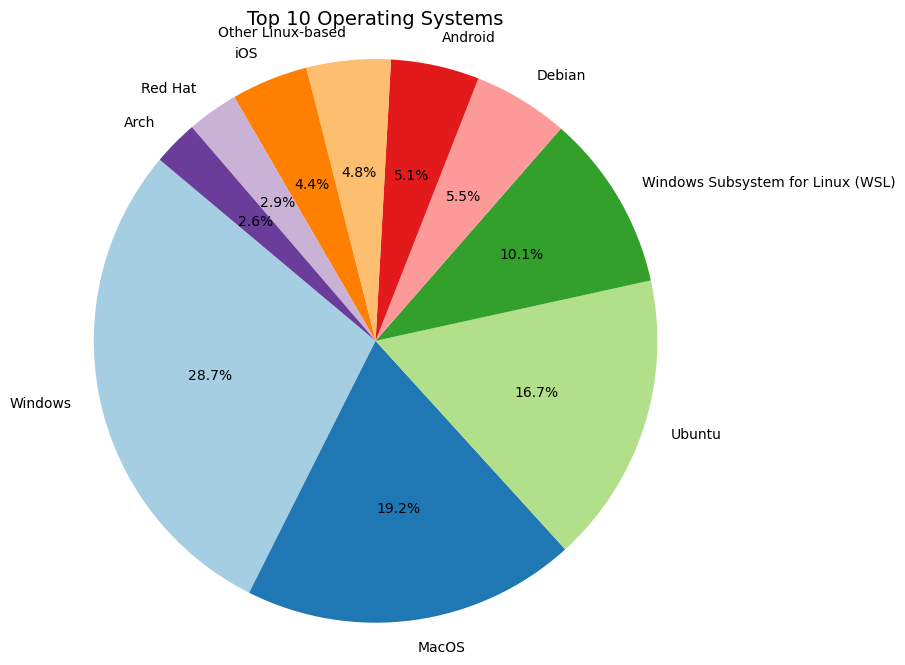

In [17]:
plt.figure(figsize=(8, 8))
colors = plt.cm.Paired.colors  # Use a color palette for distinct segments
plt.pie(
    df_op_sys,
    labels=df_op_sys.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)

# Add title
plt.title('Top 10 Operating Systems', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle
plt.show()

### Task 2: Additional Visualizations and Comparisons


##### 2.1 Pie Chart for Top 5 Programming Languages Respondents Have Worked With


The `LanguageHaveWorkedWith` column contains the programming languages that respondents have experience with. We’ll plot a pie chart to display the composition of the top 5 languages.



In [18]:
lang = df.dropna(subset=['LanguageHaveWorkedWith'])
lang.shape

(59745, 114)

In [19]:
lang['LanguageHaveWorkedWith'] = lang['LanguageHaveWorkedWith'].str.split(';')
lang_exploded = lang.explode('LanguageHaveWorkedWith')
top_10_lang = lang_exploded['LanguageHaveWorkedWith'].value_counts().head(10)
top_10_lang

C:\Users\borod\AppData\Local\Temp\ipykernel_2024\32777144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lang['LanguageHaveWorkedWith'] = lang['LanguageHaveWorkedWith'].str.split(';')


LanguageHaveWorkedWith
JavaScript                 37492
HTML/CSS                   31816
Python                     30719
SQL                        30682
TypeScript                 23150
Bash/Shell (all shells)    20412
Java                       18239
C#                         16318
C++                        13827
C                          12184
Name: count, dtype: int64

In [20]:
top_10_lang_df = top_10_lang.to_frame(name='LanguageCount')


In [21]:
print(type(top_10_lang_df))

<class 'pandas.core.frame.DataFrame'>


In [22]:
top_10_lang_df.to_csv("D:\\My\\Юля\\Data_Analytics_Ex_Files_\\Coursera\\Assignments\\Capstone Project\\Dash1_top_10_lang.csv")

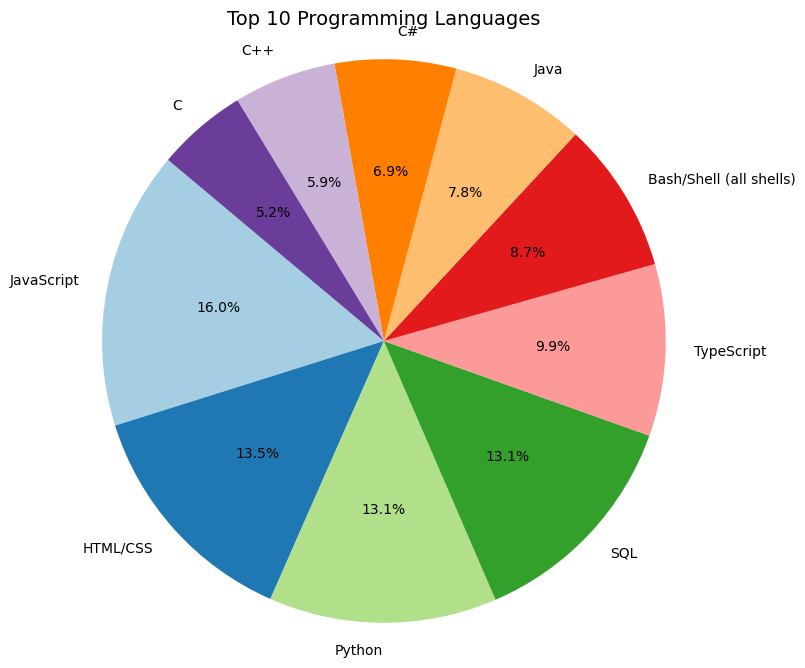

In [23]:
plt.figure(figsize=(8, 8))
colors = plt.cm.Paired.colors  # Use a color palette for distinct segments
plt.pie(
    top_10_lang,
    labels= top_10_lang.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)

# Add title
plt.title('Top 10 Programming Languages', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle
plt.show()

##### 2.2 Pie Chart for Top Collaboration Tools used in Professional Use


Using the `NEWCollabToolsHaveWorkedWith` column, we’ll identify and visualize the top collaboration tools respondents use in their professional work.



In [24]:
df['NEWCollabToolsHaveWorkedWith'] = df['NEWCollabToolsHaveWorkedWith'].str.split(';')
tool_exploded = df.explode('NEWCollabToolsHaveWorkedWith')
top_5_tools = tool_exploded['NEWCollabToolsHaveWorkedWith'].value_counts().head(5)
top_5_tools


NEWCollabToolsHaveWorkedWith
Visual Studio Code    42751
Visual Studio         17021
IntelliJ IDEA         15555
Notepad++             13874
Vim                   12523
Name: count, dtype: int64

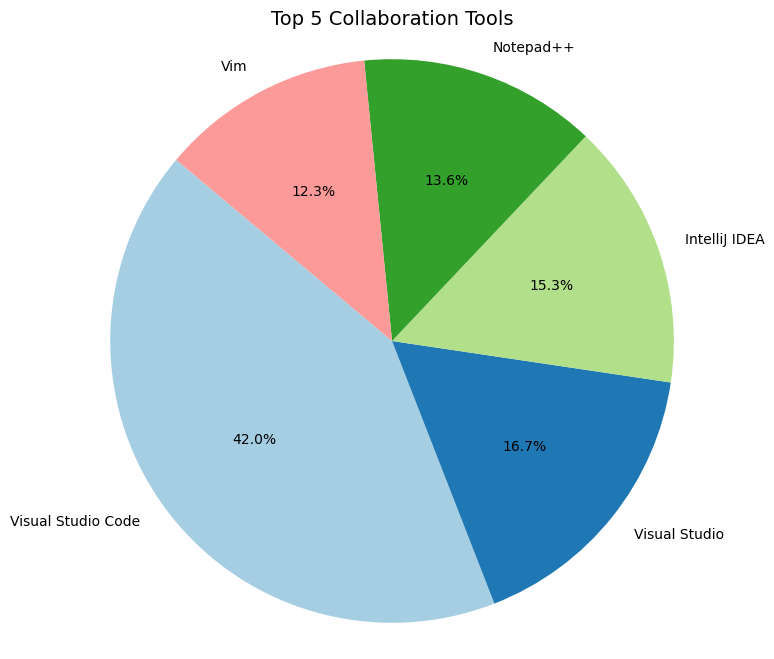

In [25]:
plt.figure(figsize=(8, 8))
colors = plt.cm.Paired.colors  # Use a color palette for distinct segments
plt.pie(
    top_5_tools,
    labels=top_5_tools.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)

# Add title
plt.title('Top 5 Collaboration Tools', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle
plt.show()

### Task 3: Analyzing and Interpreting Composition


In this task, you will create additional pie charts to analyze specific aspects of the survey data. Use `pandas` and `matplotlib` to complete each task and interpret the findings.



##### 3.1 Pie Chart of `Respondents` Most Admired Programming Languages


The `LanguageAdmired` column lists the programming languages respondents admire most. Create a pie chart to visualize the top 5 admired languages.



In [26]:
##Write your code here

##### 3.2 Pie Chart of Tools Used for AI Development


Using the `AIToolCurrently` Using column, create a pie chart to visualize the top 5 tools developers are currently using for AI development.



In [27]:
##Write your code here

##### 3.3 Pie Chart for Preferred Web Frameworks


The `WebframeWantToWorkWith` column includes web frameworks that respondents are interested in working with. Visualize the top 5 frameworks in a pie chart.



In [28]:
##Write your code here

##### 3.4 Pie Chart for Most Desired Embedded Technologies


Using the `EmbeddedWantToWorkWith` column, create a pie chart to show the top 5 most desired embedded technologies that respondents wish to work with.



In [29]:
##Write your code here

Additional

In [30]:
platf = df.dropna(subset=['PlatformHaveWorkedWith'])
platf.shape

(42366, 114)

In [31]:
platf['PlatformHaveWorkedWith'] = platf['PlatformHaveWorkedWith'].str.split(';')
platf_exploded = platf.explode('PlatformHaveWorkedWith')
top_10_platf = platf_exploded['PlatformHaveWorkedWith'].value_counts().head(10)
top_10_platf

C:\Users\borod\AppData\Local\Temp\ipykernel_2024\1288410481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  platf['PlatformHaveWorkedWith'] = platf['PlatformHaveWorkedWith'].str.split(';')


PlatformHaveWorkedWith
Amazon Web Services (AWS)    22191
Microsoft Azure              12850
Google Cloud                 11605
Cloudflare                    6974
Firebase                      6443
Vercel                        5491
Digital Ocean                 5409
Heroku                        3798
Netlify                       3238
VMware                        3043
Name: count, dtype: int64

In [32]:
top_10_platf_df = top_10_platf.to_frame(name='Count')
top_10_platf_df.to_csv("D:\\My\\Юля\\Data_Analytics_Ex_Files_\\Coursera\\Assignments\\Capstone Project\\Dash1_top_10_platf.csv")

In [33]:
web_frame = df.dropna(subset=['WebframeHaveWorkedWith'])
web_frame.shape

(45161, 114)

In [34]:
web_frame['WebframeHaveWorkedWith'] = web_frame['WebframeHaveWorkedWith'].str.split(';')
web_frame_exploded = web_frame.explode('WebframeHaveWorkedWith')
top_10_web_frame = web_frame_exploded['WebframeHaveWorkedWith'].value_counts().head(10)
top_10_web_frame

C:\Users\borod\AppData\Local\Temp\ipykernel_2024\1659963702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  web_frame['WebframeHaveWorkedWith'] = web_frame['WebframeHaveWorkedWith'].str.split(';')


WebframeHaveWorkedWith
Node.js         19772
React           19167
jQuery          10381
Next.js          8681
Express          8614
Angular          8306
ASP.NET CORE     8187
Vue.js           7483
ASP.NET          6265
Flask            6245
Name: count, dtype: int64

In [35]:
top_10_web_frame_df = top_10_web_frame.to_frame(name='Count')
top_10_web_frame_df.to_csv("D:\\My\\Юля\\Data_Analytics_Ex_Files_\\Coursera\\Assignments\\Capstone Project\\Dash1_top_10_web_frame.csv")

### Summary


After completing this lab, you will be able to:
- Create pie charts to visualize developer preferences across databases, programming languages, AI tools, and cloud platforms.
- Identify trends in technology usage, role distribution, and tool adoption through pie charts.
- Analyze and compare data composition across various categories to gain insights into developer preferences.




## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
